In [1]:
import pandas as pd

In [2]:
#Lectura a los datos del dataset de los videojuegos por dataframe
df_videojuegos = pd.read_csv('dataset_videojuegos.csv')
df_videojuegos

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7


In [3]:
# Variables categoricas y numericas
df_videojuegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


In [17]:
# Convertir release_date a formato de fecha, manejando errores
df_videojuegos["release_date"] = pd.to_datetime(df_videojuegos["release_date"], errors="coerce")

# Convertir meta_score a valores numéricos (debe ser entero)
df_videojuegos["meta_score"] = pd.to_numeric(df_videojuegos["meta_score"], errors="coerce")

# Convertir user_review a valores numéricos (puede contener valores como "tbd" que deben ser tratados como nulos)
df_videojuegos["user_review"] = pd.to_numeric(df_videojuegos["user_review"], errors="coerce")

# Identificar valores nulos después de la conversión
null = df_videojuegos.isnull().sum()

# Eliminar duplicados si existen
df_vid = df_videojuegos.drop_duplicates()

# Mostrar los valores nulos después de la limpieza
null


name               0
platform           0
release_date       0
summary          114
meta_score         0
user_review     1365
dtype: int64

In [19]:
# Identificar filas duplicadas
duplicadas = df_videojuegos.duplicated().sum()
print("\033[1;31m" + "Filas Duplicadas" + "\033[0m\n", duplicadas)

Filas Duplicadas
 0


In [21]:
# Identificar las filas categoricas
df_vid = df_videojuegos.select_dtypes(include = ['object']).columns.tolist()
print("\033[1;31m" + "Columnas Categóricas" + "\033[0m\n\n", df_vid)

Columnas Categóricas

 ['name', 'platform', 'summary']


In [23]:
df_videojuegos.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,2008-04-29,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,1999-09-08,"This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,2008-04-29,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [27]:
# Contar la data faltante (nulos)
null = df_videojuegos.isnull().sum().sort_values(ascending = False)
null_counts = null[null > 0]

for col in null_counts.index:
    perc = ((df_videojuegos[col].isnull().sum() / len(df_videojuegos)) * 100).round(2)
    print(f"\033[33;1mFilas faltantes en {col}:\033[0m {df_videojuegos[col].isnull().sum()}, \033[33;1mPorcentaje:\033[0m {perc}%")

Filas faltantes en user_review: 1365, Porcentaje: 7.26%
Filas faltantes en summary: 114, Porcentaje: 0.61%


In [29]:
# Eliminar la columna
print("\033[1;31m" + "Eliminar Columna User_Review" + "\033[0m\n")
df_videojuegos.drop('user_review', axis = 1)

Eliminar Columna User_Review



,name,platform,release_date,summary,meta_score
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,"As a young boy, Link is tricked by Ganondorf, ...",99
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,As most major publishers' development efforts ...,98
2,Grand Theft Auto IV,PlayStation 3,2008-04-29,[Metacritic's 2008 PS3 Game of the Year; Also ...,98
3,SoulCalibur,Dreamcast,1999-09-08,"This is a tale of souls and swords, transcendi...",98
4,Grand Theft Auto IV,Xbox 360,2008-04-29,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98
...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,2013-05-21,Fast & Furious: Showdown takes some of the fra...,22
18796,Drake of the 99 Dragons,Xbox,2003-11-03,Drake is out for revenge in a supernatural Hon...,22
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,2015-09-22,"Head out on a journey of redemption, driven by...",21
18798,Infestation: Survivor Stories (The War Z),PC,2012-10-15,"(Formerly known as ""The War Z"") It has been 5 ...",20


In [37]:
# Eliminar las filas en donde hace falta el dato en la columna 'director'

print("\033[1;31m" + "Eliminar Filas nulas en User_Review" + "\033[0m\n")
index = df_videojuegos[df_videojuegos['user_review'].isnull()].index
df_videojuegos.drop(index, axis = 0)
df_videojuegos.info()

Eliminar Filas nulas en User_Review

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          18800 non-null  object        
 1   platform      18800 non-null  object        
 2   release_date  18800 non-null  datetime64[ns]
 3   summary       18686 non-null  object        
 4   meta_score    18800 non-null  int64         
 5   user_review   17435 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 881.4+ KB


In [39]:
# Reemplazar los valores nulos con Unknown

print("\033[1;31m" + "Reemplazar valores con Unknown" + "\033[0m\n")
df_videojuegos['user_review'] = df_videojuegos['user_review'].fillna('Unknown')
df_videojuegos[df_videojuegos['user_review'] == "Unknown"].head()

Reemplazar valores con Unknown



,name,platform,release_date,summary,meta_score,user_review
679,Synth Riders,PlayStation 4,2021-08-10,Synth Riders is your freestyle dancing VR rhyt...,89,Unknown
963,Tiger Woods PGA Tour 2005,GameCube,2004-09-20,Challenge professional golfer Tiger Woods to c...,88,Unknown
1277,NASCAR 2005: Chase for the Cup,Xbox,2004-08-31,Do you have what it takes to be a top NASCAR d...,86,Unknown
1472,Moto Racer Advance,Game Boy Advance,2002-12-05,NaN,86,Unknown
2098,Mushihimesama,Switch,2021-06-15,Mushihimesama (Bug Princess in English) is a v...,84,Unknown


In [41]:
# Valores nulos en rating

df_videojuegos['summary'].unique()
moda = df_videojuegos['summary'].mode()[0]
df_videojuegos['summary'] = df_videojuegos['summary'].fillna(moda)
print("\033[1;31m" + "Rellenar Valores Nulos en Summary" + "\033[0m")
df_videojuegos['summary'].isnull().sum()

Rellenar Valores Nulos en Summary


0

In [43]:
# Obtener la moda de la columna platform

print("\033[1;31m" + "Moda de Columna Platform" + "\033[0m")
moda = "".join(df_videojuegos['platform'].mode())
moda

Moda de Columna Platform


' PC'

In [45]:
# Rellenar valores nulos con la moda

print("\033[1;31m" + "Rellenar con Moda" + "\033[0m\n")
df_videojuegos['platform'] = df_videojuegos['platform'].fillna(moda)
print("\033[1;33m" + "Valores Nulos:" + "\033[0m", df_videojuegos['platform'].isnull().sum())

Rellenar con Moda

Valores Nulos: 0


In [49]:
df_videojuegos['user_review'].isnull().sum()

0

In [55]:
# Obtener las columnas con valores numéricos
cols_numericos = df_videojuegos._get_numeric_data().columns

# Obtener las columnas con valores categóricos
cols_cat = df_videojuegos.select_dtypes(include = ["object"]).columns

print("\033[1;35m" + "Columnas con valores numéricos" + "\033[0m")
cols_numericos

Columnas con valores numéricos


Index(['meta_score'], dtype='object')

In [59]:
# Identificar los diferentes valores de la columna 'meta_score'

print("\033[1;31m" + "Valores de Columna Meta Score" + "\033[0m\n")
df_videojuegos.value_counts('meta_score')

Valores de Columna Meta Score



meta_score
80    701
75    681
73    675
76    669
77    665
     ... 
98      4
20      2
22      2
21      1
99      1
Name: count, Length: 80, dtype: int64

Histograma



<Axes: ylabel='Frequency'>

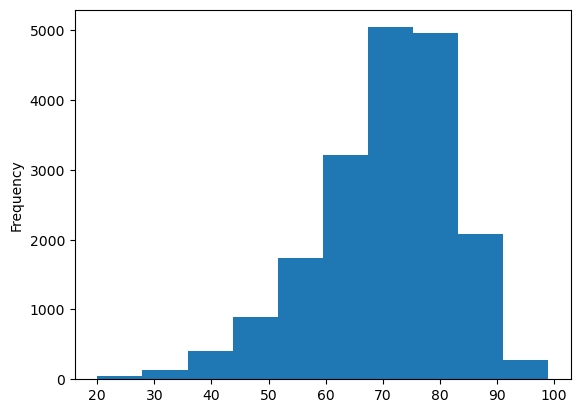

In [61]:
# Graficar los valores de la columna 'meta score'

print("\033[1;31m" + "Histograma" + "\033[0m\n")
df_videojuegos['meta_score'].plot(kind = 'hist', bins = 10)

In [63]:
# Obtener los rangos de valores de acuerdo a la gráfica

print("\033[1;33m" + "Rangos de valores" + "\033[0m\n")
df_videojuegos['meta_score'].value_counts(bins = 10).sort_index()

Rangos de valores



(19.919999999999998, 27.9]      48
(27.9, 35.8]                   139
(35.8, 43.7]                   406
(43.7, 51.6]                   893
(51.6, 59.5]                  1736
(59.5, 67.4]                  3214
(67.4, 75.3]                  5043
(75.3, 83.2]                  4964
(83.2, 91.1]                  2085
(91.1, 99.0]                   272
Name: count, dtype: int64

In [65]:
# Ver los datos atípicos: > 33.9 y < 219
# Eliminar los outlayers

print("\033[1;31m" + "Eliminar Datos Atípicos" + "\033[0m\n")
df_videojuegos = df_videojuegos[~((df_videojuegos['meta_score'] < 27.9) | (df_videojuegos['meta_score'] > 90))]

Eliminar Datos Atípicos



<Axes: >

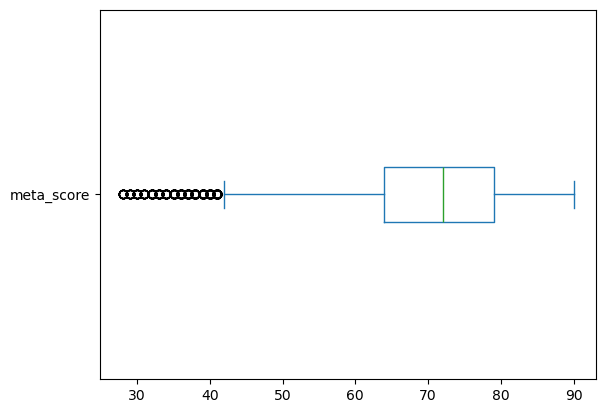

In [67]:
df_videojuegos['meta_score'].plot(kind = 'box', vert = False)